<a href="https://colab.research.google.com/github/S48avio/Simple-Perceptron/blob/main/Perceptron_using%20_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MY code implementation
Using Gradient Descent

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
import pandas as pd
import numpy as np

# Set a seed for reproducibility
np.random.seed(42)

# Generate 30 rows of marks (30-100) and CGPA (5.0-9.6)
marks = np.random.randint(30, 101, size=30)
cgpa = np.round(np.random.uniform(5.0, 9.6, size=30), 1)

# Create the 'placed' column based on a linear rule
# This ensures perfect linear separability with no outliers
placed = np.where(marks + (cgpa * 10) > 130, 1, -1)

# Combine the arrays into a DataFrame
data = {'marks': marks, 'cgpa': cgpa, 'placed': placed}
df = pd.DataFrame(data)

# Print the first 10 rows to show the pattern
print(df.head(10))

# Print the shape to confirm the number of rows and columns
print("\nDataFrame Shape:", df.shape)

   marks  cgpa  placed
0     81   7.1       1
1     44   9.0       1
2     90   8.1       1
3     50   7.1      -1
4     53   5.1      -1
5     32   9.3      -1
6     51   7.6      -1
7     82   6.8       1
8     31   5.1      -1
9     59   6.1      -1

DataFrame Shape: (30, 3)


In [86]:
X=df[['marks','cgpa']]
y=df['placed']

In [77]:
X

,marks,cgpa
0,81,7.1
1,44,9.0
2,90,8.1
3,50,7.1
4,53,5.1
5,32,9.3
6,51,7.6
7,82,6.8
8,31,5.1
9,59,6.1


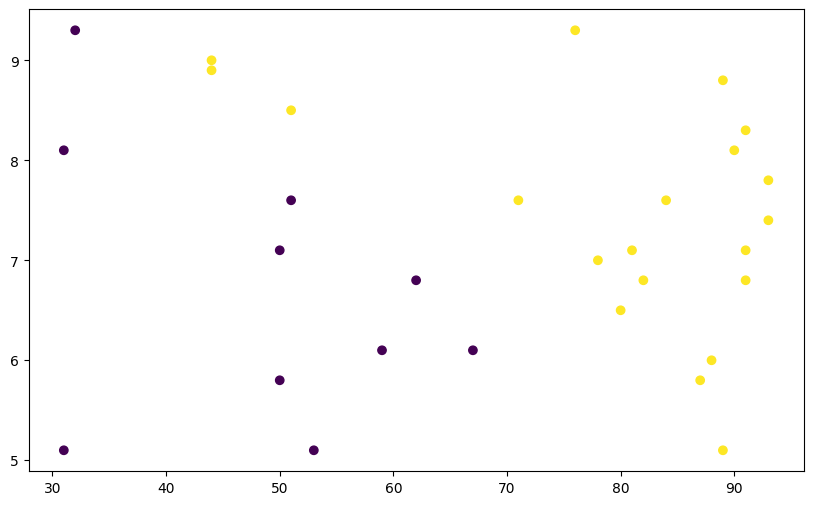

In [87]:
plt.figure(figsize=(10,6))
plt.scatter(X['marks'],X['cgpa'],c=y)

In [105]:
def perceptron_implementation(X,y):
  X=np.insert(X,0,1,axis=1)
  weights=np.ones(X.shape[1])
  lr=0.01
  for i in range(1000000):
    for j in range(X.shape[0]):
      k=y[j]*np.dot(weights,X[j,:])
      if k>=0:
        continue
      else:
        weights[0]=weights[0]+lr*(y[j])
        weights[1]=weights[1]+lr*(y[j]*X[j][1])
        weights[2]=weights[2]+lr*(y[j]*X[j][2])

  return weights


In [106]:
x=perceptron_implementation(X,y)

In [107]:
x

array([-189.58,    1.41,   14.42])

In [108]:
x_input = np.linspace(X['marks'].min() - 10, X['marks'].max() + 10, 100)

m=-(x[1]/x[2])
b=-(x[0]/x[2])
y_input=m*x_input + b
print( m,  b)


-0.09778085991680283 13.147018030485981


In [83]:
y_input

array([277.43119266, 276.50912797, 275.58706329, 274.66499861,
       273.74293392, 272.82086924, 271.89880456, 270.97673987,
       270.05467519, 269.13261051, 268.21054582, 267.28848114,
       266.36641646, 265.44435177, 264.52228709, 263.6002224 ,
       262.67815772, 261.75609304, 260.83402835, 259.91196367,
       258.98989899, 258.0678343 , 257.14576962, 256.22370494,
       255.30164025, 254.37957557, 253.45751089, 252.5354462 ,
       251.61338152, 250.69131684, 249.76925215, 248.84718747,
       247.92512278, 247.0030581 , 246.08099342, 245.15892873,
       244.23686405, 243.31479937, 242.39273468, 241.47067   ,
       240.54860532, 239.62654063, 238.70447595, 237.78241127,
       236.86034658, 235.9382819 , 235.01621722, 234.09415253,
       233.17208785, 232.25002317, 231.32795848, 230.4058938 ,
       229.48382911, 228.56176443, 227.63969975, 226.71763506,
       225.79557038, 224.8735057 , 223.95144101, 223.02937633,
       222.10731165, 221.18524696, 220.26318228, 219.34

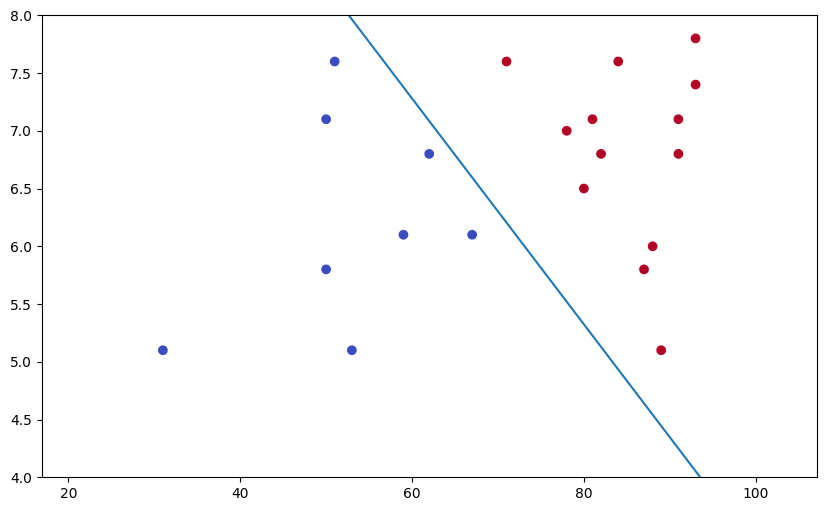

In [109]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input)

plt.scatter(X['marks'],X['cgpa'],c=y,cmap="coolwarm")
plt.ylim(4,8)
plt.show()

